# Statistical analyses of predictors

Theory from https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [1]:
# Define the gpu  on the gpu machine
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

from matplotlib import pyplot
import seaborn as sns
import matplotlib.ticker
sns.set_theme(style="whitegrid")
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from evaluation import testing
import json
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# Import Pyplot to plot the numbers
import matplotlib.pyplot as plt
import statsmodels

# Customize the plot appearance
plt.rcParams.update({
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'legend.edgecolor': 'black',
    'legend.facecolor': 'white',
    'legend.framealpha': 1,
})

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [2]:
# Import the final dataset with test sets
with open("manual-annotations/multilingual-genre-annotated-test-set.json") as main_file:
	main_dict = json.load(main_file)

main_dict.keys()

dict_keys(['mt', 'el', 'tr', 'sq', 'is', 'uk', 'ca', 'mk', 'hr', 'sl'])

We will exclude the Maltese results from the analysis.

In [38]:
del main_dict["mt"]

main_dict.keys()

dict_keys(['el', 'tr', 'sq', 'is', 'uk', 'ca', 'mk', 'hr', 'sl'])

In [3]:
# Get an array of macro F1 values
macro_F1 = [main_dict[x]["macro_f1"] for x in list(main_dict.keys())]
macro_F1

[0.4884076443296833,
 0.8435600870783095,
 0.8990631100925218,
 0.8540726817042608,
 0.7953382509303561,
 0.9483272575377839,
 0.8271009954845262,
 0.9226380344801398,
 0.882915766854554,
 0.935625159154571]

label scores

In [5]:
# Extract label-level F1 scores
label_scores = {}

for lang in list(main_dict.keys()):
	label_scores[lang] = main_dict[lang]["label_scores"]

label_scores

{'el': {'Instruction': 0.7058823529411764,
  'Forum': 0.9523809523809523,
  'Opinion/Argumentation': 0.8695652173913044,
  'Prose/Lyrical': 1.0,
  'Legal': 1.0,
  'Promotion': 0.625,
  'News': 0.9,
  'Information/Explanation': 0.6956521739130435},
 'tr': {'Instruction': 0.9,
  'Legal': 1.0,
  'Opinion/Argumentation': 0.8181818181818182,
  'Forum': 0.888888888888889,
  'News': 0.9523809523809523,
  'Information/Explanation': 0.8235294117647058,
  'Prose/Lyrical': 0.9523809523809523,
  'Promotion': 0.8571428571428572},
 'sq': {'Opinion/Argumentation': 0.6666666666666666,
  'Legal': 0.9473684210526316,
  'News': 0.888888888888889,
  'Prose/Lyrical': 0.8571428571428572,
  'Forum': 0.7777777777777777,
  'Information/Explanation': 0.8,
  'Promotion': 0.9473684210526316,
  'Instruction': 0.9473684210526316},
 'is': {'Information/Explanation': 0.5,
  'Opinion/Argumentation': 0.8181818181818182,
  'Forum': 0.9473684210526316,
  'Prose/Lyrical': 1.0,
  'Instruction': 0.7777777777777777,
  'Legal

In [6]:
# Get label-level scores
label_scores_df = pd.DataFrame(label_scores)

# Add a row with the dataset's macro F1
label_scores_df = pd.concat((label_scores_df,pd.DataFrame({"Macro F1": macro_F1}, index=list(main_dict.keys())).transpose()))

label_scores_df

,el,tr,sq,is,uk,ca,mk,hr,sl
Instruction,0.705882,0.900000,0.947368,0.777778,0.952381,0.750000,1.000000,0.750000,1.000000
Forum,0.952381,0.888889,0.777778,0.947368,0.947368,0.842105,1.000000,0.909091,1.000000
Opinion/Argumentation,0.869565,0.818182,0.666667,0.818182,0.909091,0.842105,0.777778,0.777778,0.823529
Prose/Lyrical,1.000000,0.952381,0.857143,1.000000,1.000000,0.909091,0.952381,0.857143,0.909091
Legal,1.000000,1.000000,0.947368,0.842105,1.000000,0.947368,0.947368,1.000000,0.952381
Promotion,0.625000,0.857143,0.947368,0.750000,0.777778,0.782609,0.952381,0.869565,1.000000
News,0.900000,0.952381,0.888889,0.727273,1.000000,0.823529,0.909091,0.947368,0.900000
Information/Explanation,0.695652,0.823529,0.800000,0.500000,1.000000,0.720000,0.842105,0.952381,0.900000
Macro F1,0.843560,0.899063,0.854073,0.795338,0.948327,0.827101,0.922638,0.882916,0.935625


In [7]:
# Add a column which averages the resuls in each row

label_scores_df["average"] = label_scores_df.mean(axis=1)

# add average without Maltese
#label_scores_df["average-wth-mt"] = label_scores_df.iloc[:, 1:].mean(axis=1)

label_scores_df.round(2)

,el,tr,sq,is,uk,ca,mk,hr,sl,average
Instruction,0.71,0.90,0.95,0.78,0.95,0.75,1.00,0.75,1.00,0.86
Forum,0.95,0.89,0.78,0.95,0.95,0.84,1.00,0.91,1.00,0.92
Opinion/Argumentation,0.87,0.82,0.67,0.82,0.91,0.84,0.78,0.78,0.82,0.81
Prose/Lyrical,1.00,0.95,0.86,1.00,1.00,0.91,0.95,0.86,0.91,0.94
Legal,1.00,1.00,0.95,0.84,1.00,0.95,0.95,1.00,0.95,0.96
Promotion,0.62,0.86,0.95,0.75,0.78,0.78,0.95,0.87,1.00,0.84
News,0.90,0.95,0.89,0.73,1.00,0.82,0.91,0.95,0.90,0.89
Information/Explanation,0.70,0.82,0.80,0.50,1.00,0.72,0.84,0.95,0.90,0.80
Macro F1,0.84,0.90,0.85,0.80,0.95,0.83,0.92,0.88,0.94,0.88


In [63]:
# Round values in label scores to two decimal places
print(label_scores_df.round(2).to_markdown())

|                         |     mt |   el |   tr |   sq |   is |   uk |   ca |   mk |   hr |   sl |   average |   average-wth-mt |
|:------------------------|-------:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|----------:|-----------------:|
| News                    |   0.69 | 0.9  | 0.95 | 0.89 | 0.73 | 1    | 0.82 | 0.91 | 0.95 | 0.9  |      0.87 |             0.89 |
| Opinion/Argumentation   |   0.33 | 0.87 | 0.82 | 0.67 | 0.82 | 0.91 | 0.84 | 0.78 | 0.78 | 0.82 |      0.76 |             0.81 |
| Instruction             |   0.69 | 0.71 | 0.9  | 0.95 | 0.78 | 0.95 | 0.75 | 1    | 0.75 | 1    |      0.85 |             0.86 |
| Information/Explanation |   0.52 | 0.7  | 0.82 | 0.8  | 0.5  | 1    | 0.72 | 0.84 | 0.95 | 0.9  |      0.78 |             0.8  |
| Promotion               |   0.82 | 0.62 | 0.86 | 0.95 | 0.75 | 0.78 | 0.78 | 0.95 | 0.87 | 1    |      0.84 |             0.84 |
| Forum                   |   0.18 | 0.95 | 0.89 | 0.78 | 0.95 | 0.95 | 0.84 | 1   

In [4]:
# Define relevant functions

def plot(x, y, x_name, y_name, labels):
	"""
	Args: x and y are lists of values, extracted from the main_dict in such order: "[main_dict[x][value] for x in list(main_dict.keys())]". Labels are usually the keys of main_dict - languages of test sets.
	"""
	pyplot.scatter(x, y)

	# Add labels for each dot
	for i, label in enumerate(labels):
		pyplot.text(x[i], y[i], label)


	# Set labels and title
	pyplot.xlabel(f'{x_name}')
	pyplot.ylabel(f'{y_name}')
	#pyplot.title(f'Correlation of {x_name} and {y_name}.')

	pyplot.show()

from scipy.stats import pearsonr
from scipy.stats import spearmanr

# calculate Pearson's correlation
def pearson(x, y):
	corr, p = pearsonr(x, y)
	print('Pearsons correlation: %.3f' % corr)
	print(f"p-value: {p}")


# calculate spearman's correlation
def spearman(x, y):
	corr, p = spearmanr(x, y)
	print('Spearmans correlation: %.3f' % corr)
	print(f"p-value: {p}")

# Function that combines all of the above
def analyse(x, y, labels, x_name="x", y_name="y"):
	plot(x, y, x_name, y_name, labels)
	pearson(x, y)
	spearman(x, y)

## Pearson Correlation

At the core of many statistical analyses is the concept of linear relationships between variables. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values have been centred (by subtracting their respective means).

The calculation of the sample covariance is as follows:

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to Pearson’s correlation coefficient next.

Named after Karl Pearson, The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.

Pearson’s correlation coefficient is calculated by dividing the covariance of the two variables by the product of their respective standard deviations. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1, symbolizing the full spectrum of correlation: from a complete negative correlation to a total positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

In [18]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
def pearson(macro_F1, factor):
	corr, p = pearsonr(macro_F1, factor)
	print('Pearsons correlation: %.3f' % corr)
	print(f"p-value: {p}")

## Spearman's Correlation

While many data relationships can be linear, some may be nonlinear. These nonlinear relationships are stronger or weaker across the distribution of the variables. Further, the two variables being considered may have a non-Gaussian distribution.

Named after Charles Spearman, Spearman’s correlation coefficient can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of directly working with the data samples, it operates on the relative ranks of data values. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, the Spearman correlation coefficient is a good tool to use.

As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.

In [19]:
from scipy.stats import spearmanr

# calculate spearman's correlation
def spearman(macro_F1, factor):
	corr, p = spearmanr(macro_F1, factor)
	print('Spearmans correlation: %.3f' % corr)
	print(f"p-value: {p}")

# Sizes in pretraining data

In [9]:
# We decided to go with GB which seem to be more trustworthy

"""
# Add information on sizes in XLM-RoBERTa training set - for specific language and combined with very closely related language. Sizes are in M of tokens.
sizes = {
	"mt": 0,
	"el": 4285, 
	"tr": 2736,
	"sq": 918,
	"is": 505,
	"uk": 6500,
	"ca": 1752,
	"mk": 449,
	"hr": 3297 + 14 + 843, #added Bosnian, Serbian (in that order), 
	"sl": 1669,}

sizes_with_related = {
	"mt": 0 + 2869, # Central Semitic Arabic languages (Afro-Asiatic language family): Maltese, Arabic
	"el": 4285, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"tr": 2736 + 783,
	"sq": 918, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"is": 505 + 7823 + 8494 + 778, # North Germanic languages: Icelandic, Danish, Norwegian, Swedish
	"uk": 6500 + 362 + 23408, # East Slavic: Ukrainian, Belarusian, Russian
	"ca": 1752 + 9374 + 495 + 8405, # Ibero-Romance: Catalan, Spanish, Galician, Portuguese
	"mk": 449 + 5487, # Eastern South Slavic: Macedonian, Bulgarian 
	"hr": 3297 + 1669 + 14 + 843, # Western South Slavic languages: Croatian, Slovenian, Bosnian, Serbian (in that order)
	"sl": 1669 + 3297 + 14 + 843 # Western South Slavic languages: Slovenian, Croatian, Bosnian, Serbian (in that order)
	}

sizes_list = list(sizes.values())
sizes_related_list = list(sizes_with_related.values())
"""

In the paper, we report correlation only for sizes in GB, and do not normalize the values (see `old_code/calculate_corelation_coefficient-old-data.ipynb` on how you can normalize them).

In [6]:
# Sizes in GB, from https://aclanthology.org/2020.acl-main.747.pdf

sizes_mb = {
	"mt": 0,
	"el": 46.9,
	"tr": 20.9,
	"sq": 5.4,
	"is": 3.2,
	"uk": 84.6,
	"ca": 10.1,
	"mk": 4.8,
	"hr": 20.5 +0.1 + 9.1, #added Bosnian, Serbian (in that order), 
	"sl": 10.3,
	}

sizes_mb_with_related = {
	"mt": 0 + 28.0, # Central Semitic Arabic languages (Afro-Asiatic language family): Maltese, Arabic
	"el": 46.9, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"tr": 20.9 + 6.5, # Southern Turkic (Turkic language family): Turkish, Azerbaijani
	"sq": 5.4, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"is": 3.2 + 45.6 + 49.0 + 12.1, # North Germanic languages: Icelandic, Danish, Norwegian, Swedish
	"uk": 84.6 + 4.3 + 278.0, #East Slavic: Ukrainian, Belarusian, Russian
	"ca": 10.1 + 53.3 + 2.9 + 49.1, # Ibero-Romance: Catalan, Spanish, Galician, Portuguese
	"mk": 4.8 + 57.5, # Eastern South Slavic: Macedonian, Bulgarian
	"hr": 20.5 + 0.1 + 9.1 + 10.3, # Western South Slavic languages: Croatian, Bosnian, Serbian, Slovenian (in that order)
	"sl": 10.3 + 20.5 + 0.1 + 9.1 # Western South Slavic languages: Slovenian, Croatian, Bosnian, Serbian (in that order)
	}

In [7]:
sizes_mb_list = list(sizes_mb.values())
sizes_mb_related_list = list(sizes_mb_with_related.values())

# Calculate correlation
for i in [sizes_mb_list, sizes_mb_related_list]:
		pearson(macro_F1, i)
		spearman(macro_F1, i)
		print("\n")

Pearsons correlation: 0.414
p-value: 0.23427547869351117
Spearmans correlation: 0.588
p-value: 0.07387770688865801


Pearsons correlation: 0.288
p-value: 0.41972254729183944
Spearmans correlation: 0.122
p-value: 0.7379379712336098




In [8]:
# Create a df

pretraining_df = pd.DataFrame({"lang": list(main_dict.keys()), "macro_F1": macro_F1, "sizes_GB": sizes_mb_list, "sizes_wth_related": sizes_mb_related_list})

pretraining_df

,lang,macro_F1,sizes_GB,sizes_wth_related
0,mt,0.488408,0.0,28.0
1,el,0.843560,46.9,46.9
2,tr,0.899063,20.9,27.4
3,sq,0.854073,5.4,5.4
4,is,0.795338,3.2,109.9
5,uk,0.948327,84.6,366.9
6,ca,0.827101,10.1,115.4
7,mk,0.922638,4.8,62.3
8,hr,0.882916,29.7,40.0
9,sl,0.935625,10.3,40.0


Text(0.5, 36.26562499999997, 'Test Language (GB)')

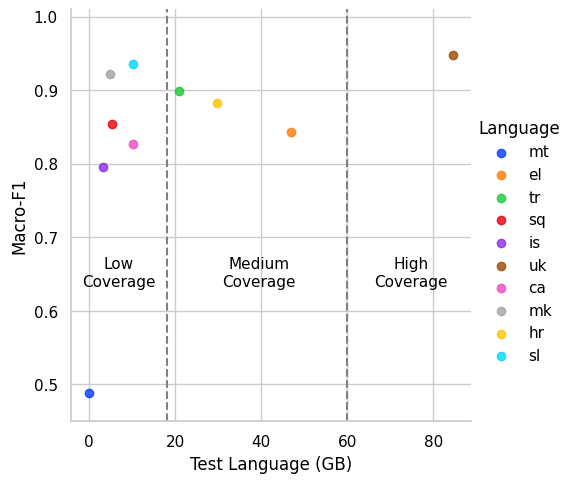

In [27]:
fig = sns.lmplot(x="sizes_GB", y="macro_F1", data=pretraining_df, ci=None, hue="lang", legend=False, palette=sns.color_palette("bright"), height=5)
fig.set(ylim=(0.45, 1.01))
fig.add_legend(title='Language')

# Add a horizontal lines
plt.axvline(x=60, color='grey', linestyle='--')
plt.axvline(x=18, color='grey', linestyle='--')

# Add text annotations
plt.text(x=0.85, y=0.36, s="High\nCoverage", ha='center', va='center', fontsize=11, transform=plt.gca().transAxes)
plt.text(x=0.47, y=0.36, s="Medium\nCoverage", ha='center', va='center', fontsize=11, transform=plt.gca().transAxes)
plt.text(x=0.12, y=0.36, s="Low\nCoverage", ha='center', va='center', fontsize=11, transform=plt.gca().transAxes)

# Customize the legend title
#fig.add_legend(title='Language')
fig.ax.set_ylabel("Macro-F1")
fig.ax.set_xlabel("Test Language (GB)")

Text(0.5, 36.26562499999997, 'Test Language and Related Languages (GB)')

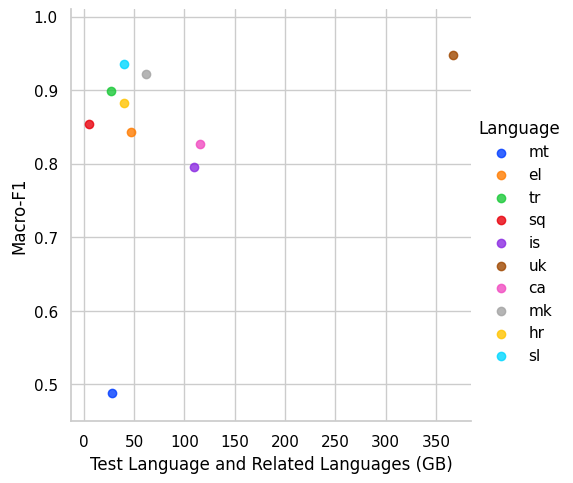

In [14]:
fig = sns.lmplot(x="sizes_wth_related", y="macro_F1", data=pretraining_df, ci=None, hue="lang", legend=False, palette=sns.color_palette("bright"), height=5)
fig.set(ylim=(0.45, 1.01))
# Customize the legend title
fig.add_legend(title='Language')
fig.ax.set_ylabel("Macro-F1")
fig.ax.set_xlabel("Test Language and Related Languages (GB)")



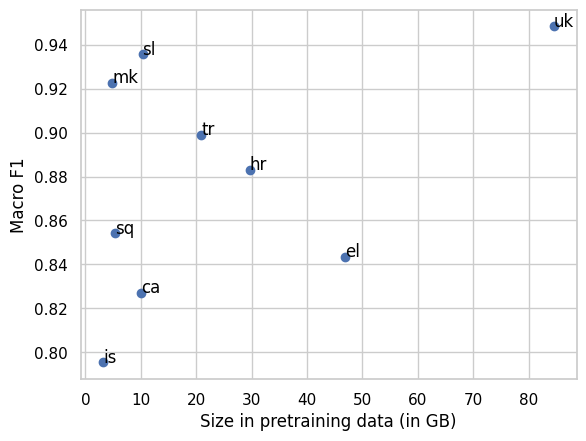

Pearsons correlation: 0.415
p-value: 0.26703442808193567
Spearmans correlation: 0.433
p-value: 0.2439524358800516


In [73]:
# Get results for sizes_mb and sizes_mb_related
labels = list(main_dict.keys())

analyse(sizes_mb_list, macro_F1, labels, x_name="Size in pretraining data (in GB)", y_name="Macro F1", )

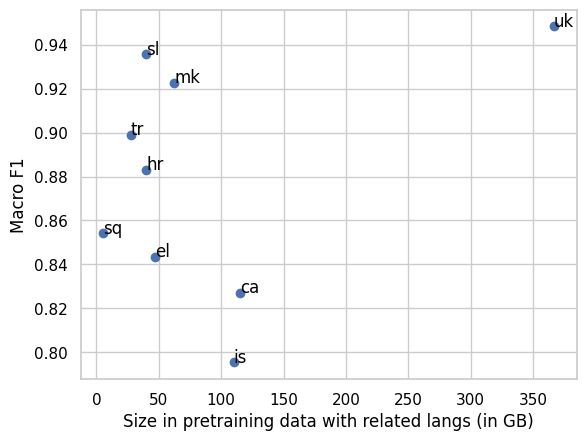

Pearsons correlation: 0.312
p-value: 0.41299804411973834
Spearmans correlation: -0.042
p-value: 0.9148857180816652


In [74]:
analyse(sizes_mb_related_list, macro_F1, labels, x_name="Size in pretraining data with related langs (in GB)", y_name="Macro F1",)

# Correlation of level of relatedness and macro F1 scores

In [43]:
pretraining_df

,lang,macro_F1,sizes_GB,sizes_wth_related
0,el,0.843560,46.9,46.9
1,tr,0.899063,20.9,27.4
2,sq,0.854073,5.4,5.4
3,is,0.795338,3.2,109.9
4,uk,0.948327,84.6,366.9
5,ca,0.827101,10.1,115.4
6,mk,0.922638,4.8,62.3
7,hr,0.882916,29.7,40.0
8,sl,0.935625,10.3,40.0


In [44]:
# Add level of relatedness
relatedness = [#0, #maltese
			   1, 0, 1, 2, 2, 1, 3, 4, 5]

pretraining_df["relatedness"] = relatedness

pretraining_df

,lang,macro_F1,sizes_GB,sizes_wth_related,relatedness
0,el,0.843560,46.9,46.9,1
1,tr,0.899063,20.9,27.4,0
2,sq,0.854073,5.4,5.4,1
3,is,0.795338,3.2,109.9,2
4,uk,0.948327,84.6,366.9,2
5,ca,0.827101,10.1,115.4,1
6,mk,0.922638,4.8,62.3,3
7,hr,0.882916,29.7,40.0,4
8,sl,0.935625,10.3,40.0,5


In [47]:
pretraining_df[["lang", "relatedness", "macro_F1"]]

,lang,relatedness,macro_F1
0,el,1,0.843560
1,tr,0,0.899063
2,sq,1,0.854073
3,is,2,0.795338
4,uk,2,0.948327
5,ca,1,0.827101
6,mk,3,0.922638
7,hr,4,0.882916
8,sl,5,0.935625


Text(0.5, 36.00000000000003, 'Relatedness Ranking')

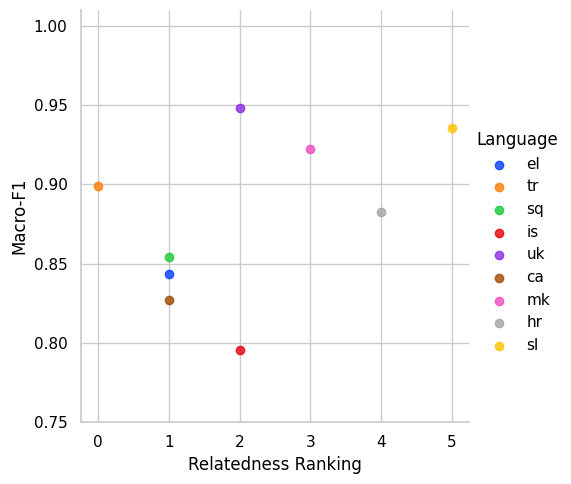

In [46]:
fig = sns.lmplot(x="relatedness", y="macro_F1", data=pretraining_df, ci=None, hue="lang", legend=False, palette=sns.color_palette("bright"), height=5)
fig.set(ylim=(0.75, 1.01))
# Customize the legend title
fig.add_legend(title='Language')
fig.ax.set_ylabel("Macro-F1")
fig.ax.set_xlabel("Relatedness Ranking")

In [17]:
pretraining_df["group_average"] = pretraining_df.groupby('relatedness')['macro_F1'].transform('mean')

pretraining_df

,lang,macro_F1,sizes_GB,sizes_wth_related,relatedness,group_average
0,el,0.843560,46.9,46.9,1,0.841578
1,tr,0.899063,20.9,27.4,0,0.899063
2,sq,0.854073,5.4,5.4,1,0.841578
3,is,0.795338,3.2,109.9,2,0.871833
4,uk,0.948327,84.6,366.9,2,0.871833
5,ca,0.827101,10.1,115.4,1,0.841578
6,mk,0.922638,4.8,62.3,3,0.922638
7,hr,0.882916,29.7,40.0,4,0.882916
8,sl,0.935625,10.3,40.0,5,0.935625


In [21]:
relatedness_df = pretraining_df.drop_duplicates(subset="relatedness")

relatedness_df = relatedness_df[["relatedness", "group_average"]].sort_values(by="group_average", ascending=False)

relatedness_df

,relatedness,group_average
8,5,0.935625
6,3,0.922638
1,0,0.899063
7,4,0.882916
3,2,0.871833
0,1,0.841578


# Correlation of token overlap and macro F1 scores

## Dataset-level

In [15]:
main_dict["sl"]['token_overlap'].keys()

dict_keys(['overlap_percentage', 'token_list', 'overlap_token_list', 'label_level_token_lists', 'label_overlap_percentage', 'label_overlap_token_list'])

In [16]:
# Get an array of token overlap in percentages
overlap = [main_dict[x]['token_overlap']['overlap_percentage'] for x in list(main_dict.keys())]
overlap

[0.1614276568501921,
 0.5208719382770122,
 0.6038502030380508,
 0.5130030019900833,
 0.15665821179454664,
 0.7448446122567529,
 0.14598936285683273,
 0.8215173660815189,
 0.9742887570363609]

In [17]:
# Add to the pretraining df

pretraining_df["token_overlap_perc"] = overlap

# Add information about Latin script

pretraining_df["script"] = ["Greek", "Latin", "Latin", "Latin", "Cyrillic", "Latin", "Cyrillic", "Latin", "Latin"]

pretraining_df

,lang,macro_F1,sizes_GB,sizes_wth_related,token_overlap_perc,script
0,el,0.843560,46.9,46.9,0.161428,Greek
1,tr,0.899063,20.9,27.4,0.520872,Latin
2,sq,0.854073,5.4,5.4,0.603850,Latin
3,is,0.795338,3.2,109.9,0.513003,Latin
4,uk,0.948327,84.6,366.9,0.156658,Cyrillic
5,ca,0.827101,10.1,115.4,0.744845,Latin
6,mk,0.922638,4.8,62.3,0.145989,Cyrillic
7,hr,0.882916,29.7,40.0,0.821517,Latin
8,sl,0.935625,10.3,40.0,0.974289,Latin


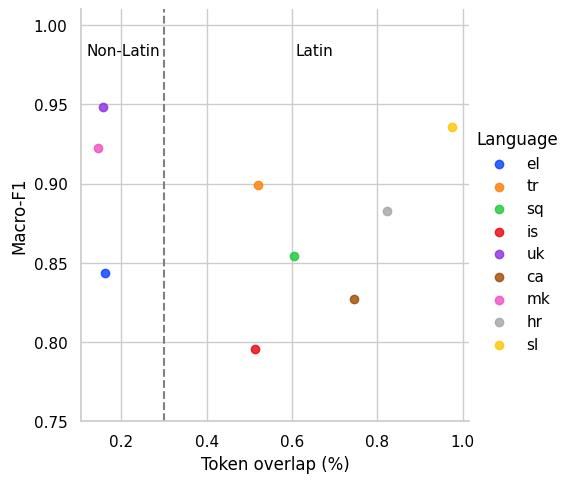

In [30]:
fig = sns.lmplot(x="token_overlap_perc", y="macro_F1", data=pretraining_df, hue="lang", legend=False, palette=sns.color_palette("bright"), height=5)#ci=None,
fig.set(ylim=(0.75, 1.01))
#sns.regplot(x="token_overlap_perc", y="macro_F1", data=pretraining_df[pretraining_df["script"] == "Latin"], scatter=False, ax=fig.axes[0, 0], ci=None)

# Customize the legend title
fig.add_legend(title='Language')
fig.ax.set_ylabel("Macro-F1")
fig.ax.set_xlabel("Token overlap (%)")


# Add a horizontal line at y=0.3
plt.axvline(x=0.3, color='grey', linestyle='--')

# Add text annotations
plt.text(x=0.11, y=0.9, s="Non-Latin", ha='center', va='center', fontsize=11, transform=plt.gca().transAxes)
plt.text(x=0.6, y=0.9, s="Latin", ha='center', va='center', fontsize=11, transform=plt.gca().transAxes)

# Show the plot
plt.show()

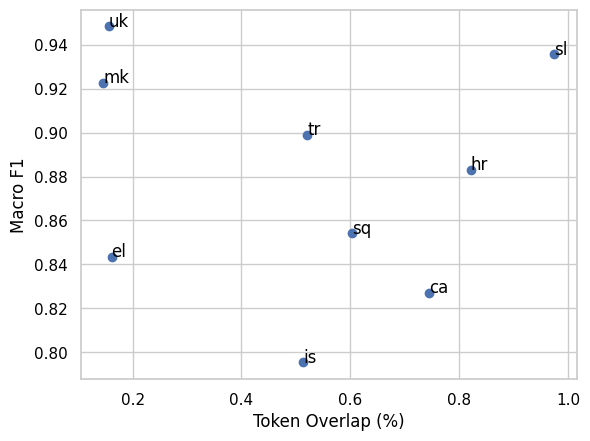

Pearsons correlation: -0.117
p-value: 0.7641110641805909
Spearmans correlation: -0.117
p-value: 0.7650079429261462


In [89]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(overlap, macro_F1, labels, x_name="Token Overlap (%)", y_name="Macro F1")

In [92]:
pretraining_df_Latin = pretraining_df[pretraining_df["script"] == "Latin"]

pretraining_df_Latin

,lang,macro_F1,sizes_GB,sizes_wth_related,token_overlap_perc,script
1,tr,0.899063,20.9,27.4,0.520872,Latin
2,sq,0.854073,5.4,5.4,0.603850,Latin
3,is,0.795338,3.2,109.9,0.513003,Latin
5,ca,0.827101,10.1,115.4,0.744845,Latin
7,hr,0.882916,29.7,40.0,0.821517,Latin
8,sl,0.935625,10.3,40.0,0.974289,Latin


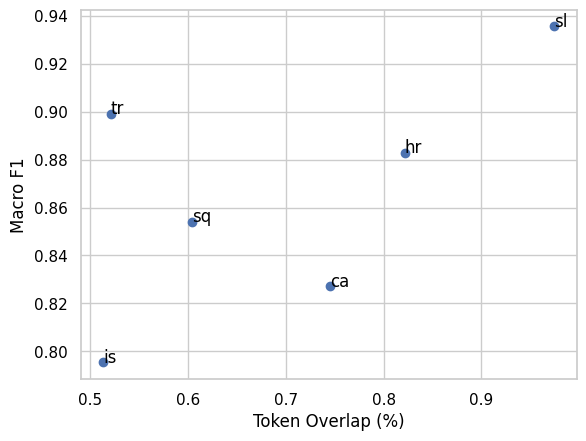

Pearsons correlation: 0.598
p-value: 0.20974587248365548
Spearmans correlation: 0.600
p-value: 0.20799999999999982


In [93]:
# Analyse the correlation for Latin languages only
labels = pretraining_df_Latin["lang"].to_list()
analyse(pretraining_df_Latin["token_overlap_perc"].to_list(), pretraining_df_Latin["macro_F1"].to_list(), labels, x_name="Token Overlap (%)", y_name="Macro F1")

## Label-level

In [22]:
# Get label-level scores
label_scores = pd.read_json("label-level-scores.json")

label_scores

,mt,el,tr,sq,is,uk,ca,mk,hr,sl
News,0.692308,0.900000,0.952381,0.888889,0.727273,1.000000,0.823529,0.909091,0.947368,0.900000
Opinion/Argumentation,0.333333,0.869565,0.818182,0.666667,0.818182,0.909091,0.842105,0.777778,0.777778,0.823529
Instruction,0.689655,0.705882,0.900000,0.947368,0.777778,0.952381,0.750000,1.000000,0.750000,1.000000
Information/Explanation,0.521739,0.695652,0.823529,0.800000,0.500000,1.000000,0.720000,0.842105,0.952381,0.900000
Promotion,0.818182,0.625000,0.857143,0.947368,0.750000,0.777778,0.782609,0.952381,0.869565,1.000000
Forum,0.181818,0.952381,0.888889,0.777778,0.947368,0.947368,0.842105,1.000000,0.909091,1.000000
Prose/Lyrical,0.181818,1.000000,0.952381,0.857143,1.000000,1.000000,0.909091,0.952381,0.857143,0.909091
Legal,NaN,1.000000,1.000000,0.947368,0.842105,1.000000,0.947368,0.947368,1.000000,0.952381


In [23]:
label_scores_dict = label_scores.to_dict()

In [24]:
# Get scores in format "mt-News"
label_scores_new_dict = {}

for lang in list(label_scores.keys()):
	for label in list(label_scores[lang].keys()):
		label_scores_new_dict[f"{lang}-{label}"] = label_scores[lang][label]

label_scores_new_dict

{'mt-News': 0.6923076923076921,
 'mt-Opinion/Argumentation': 0.33333333333333304,
 'mt-Instruction': 0.689655172413793,
 'mt-Information/Explanation': 0.521739130434782,
 'mt-Promotion': 0.818181818181818,
 'mt-Forum': 0.18181818181818102,
 'mt-Prose/Lyrical': 0.18181818181818102,
 'mt-Legal': nan,
 'el-News': 0.9,
 'el-Opinion/Argumentation': 0.8695652173913041,
 'el-Instruction': 0.7058823529411761,
 'el-Information/Explanation': 0.695652173913043,
 'el-Promotion': 0.625,
 'el-Forum': 0.9523809523809521,
 'el-Prose/Lyrical': 1.0,
 'el-Legal': 1.0,
 'tr-News': 0.9523809523809521,
 'tr-Opinion/Argumentation': 0.818181818181818,
 'tr-Instruction': 0.9,
 'tr-Information/Explanation': 0.8235294117647051,
 'tr-Promotion': 0.8571428571428571,
 'tr-Forum': 0.8888888888888891,
 'tr-Prose/Lyrical': 0.9523809523809521,
 'tr-Legal': 1.0,
 'sq-News': 0.8888888888888891,
 'sq-Opinion/Argumentation': 0.6666666666666661,
 'sq-Instruction': 0.9473684210526311,
 'sq-Information/Explanation': 0.8,
 'sq

In [25]:
label_scores_df = pd.DataFrame({"label":list(label_scores_new_dict.keys()), "F1": list(label_scores_new_dict.values())})
label_scores_df

,label,F1
0,mt-News,0.692308
1,mt-Opinion/Argumentation,0.333333
2,mt-Instruction,0.689655
3,mt-Information/Explanation,0.521739
4,mt-Promotion,0.818182
...,...,...
75,sl-Information/Explanation,0.900000
76,sl-Promotion,1.000000
77,sl-Forum,1.000000
78,sl-Prose/Lyrical,0.909091


In [26]:
# Get label-level overlap percentages
label_overlap = pd.read_csv("datasets/label-level-token-overlap.csv", index_col = 0)
label_overlap

,label,overlap
0,mt-Information/Explanation,0.714543
1,mt-News,0.708364
2,mt-Instruction,0.619401
3,mt-Opinion/Argumentation,0.682129
4,mt-Forum,0.583984
...,...,...
74,sl-Opinion/Argumentation,0.888709
75,sl-Forum,0.801008
76,sl-Prose/Lyrical,0.699553
77,sl-Legal,0.755659


In [27]:
# Merge the two dfs
label_merged = pd.merge(left=label_overlap, right=label_scores_df, on="label")
label_merged

,label,overlap,F1
0,mt-Information/Explanation,0.714543,0.521739
1,mt-News,0.708364,0.692308
2,mt-Instruction,0.619401,0.689655
3,mt-Opinion/Argumentation,0.682129,0.333333
4,mt-Forum,0.583984,0.181818
...,...,...,...
74,sl-Opinion/Argumentation,0.888709,0.823529
75,sl-Forum,0.801008,1.000000
76,sl-Prose/Lyrical,0.699553,0.909091
77,sl-Legal,0.755659,0.952381


Plot in different colors for each of the labels

In [28]:
# Add additional columns in the df with information on the labels and lang
label_merged["lang"] = label_merged["label"].apply(lambda x: x.split("-")[0])
label_merged["genre"] = label_merged["label"].apply(lambda x: x.split("-")[1])
label_merged.head(2)

,label,overlap,F1,lang,genre
0,mt-Information/Explanation,0.714543,0.521739,mt,Information/Explanation
1,mt-News,0.708364,0.692308,mt,News


In [29]:
label_merged[label_merged["lang"] == "mt"].sort_values(by="F1")

,label,overlap,F1,lang,genre
4,mt-Forum,0.583984,0.181818,mt,Forum
5,mt-Prose/Lyrical,0.591797,0.181818,mt,Prose/Lyrical
3,mt-Opinion/Argumentation,0.682129,0.333333,mt,Opinion/Argumentation
0,mt-Information/Explanation,0.714543,0.521739,mt,Information/Explanation
2,mt-Instruction,0.619401,0.689655,mt,Instruction
1,mt-News,0.708364,0.692308,mt,News
6,mt-Promotion,0.657877,0.818182,mt,Promotion


In [30]:
# Extract vectors for each genre
for label in ['Information/Explanation', 'News', 'Instruction','Opinion/Argumentation', 'Forum', 'Prose/Lyrical', 'Legal','Promotion']:
	current_df = label_merged[label_merged["genre"] == label]
	current_overlap = current_df["overlap"].to_list()
	current_F1 = current_df["F1"].to_list()

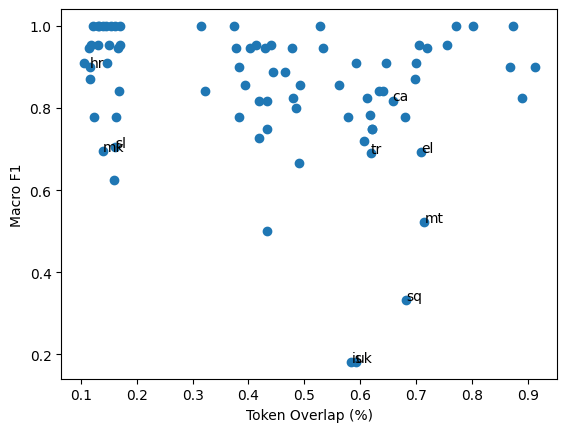

Pearsons correlation: -0.222
p-value: 0.04956405395243631
Spearmans correlation: -0.248
p-value: 0.027340371679298852


In [32]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(label_merged["overlap"].to_list(), label_merged["F1"].to_list(), labels, x_name="Token Overlap (%)", y_name="Macro F1")

Text(0.5, 0, 'Token (Label-level) Overlap (%)')

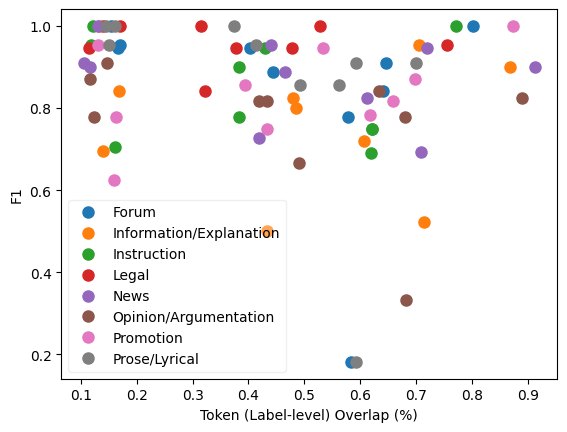

In [46]:
y = label_merged["F1"]
x = label_merged["overlap"]


# Define the criteria - based on which column will the instances be grouped
groups = label_merged.groupby('genre')

for name, group in groups:
    plt.plot(group["overlap"], group["F1"], marker='o', linestyle='', markersize=8, label=name);

plt.legend(framealpha=0.3)
plt.ylabel("F1")
plt.xlabel("Token (Label-level) Overlap (%)")
#plt.title('Correlation of token overlap (%) and F1 scores for each of the labels')

# Correlation of English word overlap

In [70]:
main_dict["sl"]['English_word_overlap'].keys()

dict_keys(['overlap_percentage', 'all_words', 'overlap_words', 'label_level_word_lists', 'label_overlap_percentage', 'label_overlap_token_list'])

In [71]:
# Get an array of token overlap in percentages
overlap = [main_dict[x]['English_word_overlap']['overlap_percentage'] for x in list(main_dict.keys())]
overlap

[0.9093551797040169,
 0.900834649221746,
 0.9044013858591043,
 0.9018958772193801,
 0.9026613353970506,
 0.9103291260584758,
 0.9031615633557382,
 0.9402651246522284,
 0.934523502399257,
 0.9370197300103842]

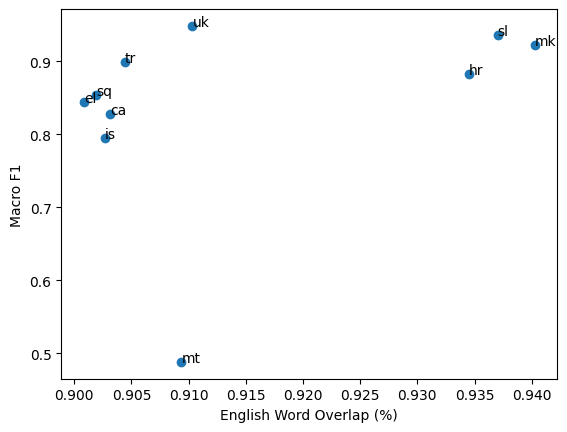

Pearsons correlation: 0.330
p-value: 0.3520290784980444
Spearmans correlation: 0.600
p-value: 0.06668799999999996


In [72]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(overlap, macro_F1, labels, x_name="English Word Overlap (%)", y_name="Macro F1")

## Label-level

In [73]:
# Get label-level scores
label_scores = pd.read_json("label-level-scores.json")

label_scores

,mt,el,tr,sq,is,uk,ca,mk,hr,sl
News,0.692308,0.900000,0.952381,0.888889,0.727273,1.000000,0.823529,0.909091,0.947368,0.900000
Opinion/Argumentation,0.333333,0.869565,0.818182,0.666667,0.818182,0.909091,0.842105,0.777778,0.777778,0.823529
Instruction,0.689655,0.705882,0.900000,0.947368,0.777778,0.952381,0.750000,1.000000,0.750000,1.000000
Information/Explanation,0.521739,0.695652,0.823529,0.800000,0.500000,1.000000,0.720000,0.842105,0.952381,0.900000
Promotion,0.818182,0.625000,0.857143,0.947368,0.750000,0.777778,0.782609,0.952381,0.869565,1.000000
Forum,0.181818,0.952381,0.888889,0.777778,0.947368,0.947368,0.842105,1.000000,0.909091,1.000000
Prose/Lyrical,0.181818,1.000000,0.952381,0.857143,1.000000,1.000000,0.909091,0.952381,0.857143,0.909091
Legal,NaN,1.000000,1.000000,0.947368,0.842105,1.000000,0.947368,0.947368,1.000000,0.952381


In [74]:
label_scores_dict = label_scores.to_dict()

In [75]:
# Get scores in format "mt-News"
label_scores_new_dict = {}

for lang in list(label_scores.keys()):
	for label in list(label_scores[lang].keys()):
		label_scores_new_dict[f"{lang}-{label}"] = label_scores[lang][label]

label_scores_new_dict

{'mt-News': 0.6923076923076921,
 'mt-Opinion/Argumentation': 0.33333333333333304,
 'mt-Instruction': 0.689655172413793,
 'mt-Information/Explanation': 0.521739130434782,
 'mt-Promotion': 0.818181818181818,
 'mt-Forum': 0.18181818181818102,
 'mt-Prose/Lyrical': 0.18181818181818102,
 'mt-Legal': nan,
 'el-News': 0.9,
 'el-Opinion/Argumentation': 0.8695652173913041,
 'el-Instruction': 0.7058823529411761,
 'el-Information/Explanation': 0.695652173913043,
 'el-Promotion': 0.625,
 'el-Forum': 0.9523809523809521,
 'el-Prose/Lyrical': 1.0,
 'el-Legal': 1.0,
 'tr-News': 0.9523809523809521,
 'tr-Opinion/Argumentation': 0.818181818181818,
 'tr-Instruction': 0.9,
 'tr-Information/Explanation': 0.8235294117647051,
 'tr-Promotion': 0.8571428571428571,
 'tr-Forum': 0.8888888888888891,
 'tr-Prose/Lyrical': 0.9523809523809521,
 'tr-Legal': 1.0,
 'sq-News': 0.8888888888888891,
 'sq-Opinion/Argumentation': 0.6666666666666661,
 'sq-Instruction': 0.9473684210526311,
 'sq-Information/Explanation': 0.8,
 'sq

In [76]:
label_scores_df = pd.DataFrame({"label":list(label_scores_new_dict.keys()), "F1": list(label_scores_new_dict.values())})
label_scores_df

,label,F1
0,mt-News,0.692308
1,mt-Opinion/Argumentation,0.333333
2,mt-Instruction,0.689655
3,mt-Information/Explanation,0.521739
4,mt-Promotion,0.818182
...,...,...
75,sl-Information/Explanation,0.900000
76,sl-Promotion,1.000000
77,sl-Forum,1.000000
78,sl-Prose/Lyrical,0.909091


In [77]:
# Get label-level overlap percentages
label_overlap = pd.read_csv("datasets/label-level-English-world-overlap.csv", index_col = 0)
label_overlap

,label,overlap
0,mt-Information/Explanation,0.860995
1,mt-News,0.869376
2,mt-Instruction,0.839773
3,mt-Opinion/Argumentation,0.840929
4,mt-Forum,0.736739
...,...,...
74,sl-Opinion/Argumentation,0.887936
75,sl-Forum,0.814320
76,sl-Prose/Lyrical,0.839646
77,sl-Legal,0.825265


In [78]:
# Merge the two dfs
label_merged = pd.merge(left=label_overlap, right=label_scores_df, on="label")
label_merged

,label,overlap,F1
0,mt-Information/Explanation,0.860995,0.521739
1,mt-News,0.869376,0.692308
2,mt-Instruction,0.839773,0.689655
3,mt-Opinion/Argumentation,0.840929,0.333333
4,mt-Forum,0.736739,0.181818
...,...,...,...
74,sl-Opinion/Argumentation,0.887936,0.823529
75,sl-Forum,0.814320,1.000000
76,sl-Prose/Lyrical,0.839646,0.909091
77,sl-Legal,0.825265,0.952381


Plot in different colors for each of the labels

In [79]:
# Add additional columns in the df with information on the labels and lang
label_merged["lang"] = label_merged["label"].apply(lambda x: x.split("-")[0])
label_merged["genre"] = label_merged["label"].apply(lambda x: x.split("-")[1])
label_merged.head(2)

,label,overlap,F1,lang,genre
0,mt-Information/Explanation,0.860995,0.521739,mt,Information/Explanation
1,mt-News,0.869376,0.692308,mt,News


In [81]:
label_merged[label_merged["lang"] == "mt"].sort_values(by="F1", ascending=False)

,label,overlap,F1,lang,genre
6,mt-Promotion,0.836786,0.818182,mt,Promotion
1,mt-News,0.869376,0.692308,mt,News
2,mt-Instruction,0.839773,0.689655,mt,Instruction
0,mt-Information/Explanation,0.860995,0.521739,mt,Information/Explanation
3,mt-Opinion/Argumentation,0.840929,0.333333,mt,Opinion/Argumentation
4,mt-Forum,0.736739,0.181818,mt,Forum
5,mt-Prose/Lyrical,0.802846,0.181818,mt,Prose/Lyrical


In [82]:
# Extract vectors for each genre
for label in ['Information/Explanation', 'News', 'Instruction','Opinion/Argumentation', 'Forum', 'Prose/Lyrical', 'Legal','Promotion']:
	current_df = label_merged[label_merged["genre"] == label]
	current_overlap = current_df["overlap"].to_list()
	current_F1 = current_df["F1"].to_list()

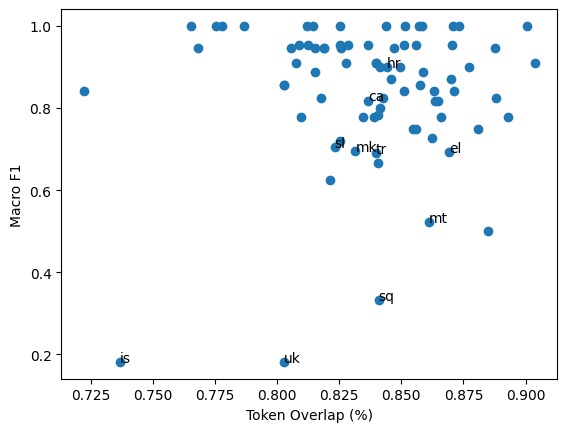

Pearsons correlation: 0.057
p-value: 0.6175767031873804
Spearmans correlation: -0.130
p-value: 0.2531020459829333


In [83]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(label_merged["overlap"].to_list(), label_merged["F1"].to_list(), labels, x_name="Token Overlap (%)", y_name="Macro F1")

Text(0.5, 0, 'English Word (Label-level) Overlap (%)')

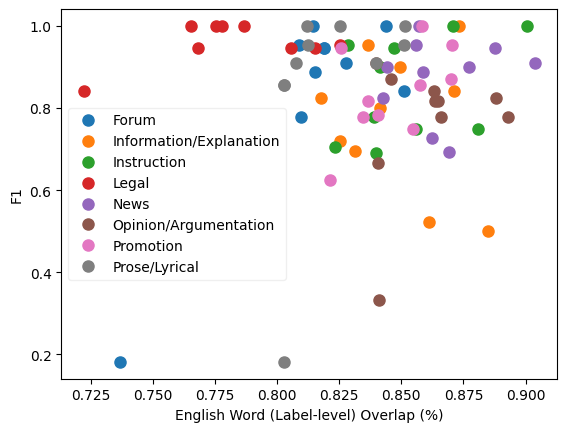

In [85]:
y = label_merged["F1"]
x = label_merged["overlap"]


# Define the criteria - based on which column will the instances be grouped
groups = label_merged.groupby('genre')

for name, group in groups:
    plt.plot(group["overlap"], group["F1"], marker='o', linestyle='', markersize=8, label=name);

plt.legend(framealpha=0.3)
plt.ylabel("F1")
plt.xlabel("English Word (Label-level) Overlap (%)")
#plt.title('Correlation of token overlap (%) and F1 scores for each of the labels')

# Correlation of lang2vec features and performance

In [7]:
# Import the cosine similarity values for all features
with open("datasets/lang2vec_cosine_similarities.json", "r") as json_file:
	features_dict = json.load(json_file)

features_dict

{'syntax_knn': {'sl': {'similarity-to-sl': 1.0,
   'similarity-to-en': 0.7071067811865476,
   'avg_similarity': 0.8535533905932737},
  'hr': {'similarity-to-sl': 0.9259259259259259,
   'similarity-to-en': 0.7463904912524668,
   'avg_similarity': 0.8361582085891963},
  'sr': {'similarity-to-sl': 0.9819805060619657,
   'similarity-to-en': 0.6943650748294136,
   'avg_similarity': 0.8381727904456897},
  'hbs': {'similarity-to-sl': 0.9629629629629629,
   'similarity-to-en': 0.6678230711206282,
   'avg_similarity': 0.8153930170417956},
  'mk': {'similarity-to-sl': 0.9456108576893003,
   'similarity-to-en': 0.7715167498104595,
   'avg_similarity': 0.85856380374988},
  'bg': {'similarity-to-sl': 0.8888888888888888,
   'similarity-to-en': 0.7856742013183862,
   'avg_similarity': 0.8372815451036375},
  'is': {'similarity-to-sl': 0.7925939239012171,
   'similarity-to-en': 0.8006407690254358,
   'avg_similarity': 0.7966173464633264},
  'tr': {'similarity-to-sl': 0.42339019740572553,
   'similarity

In [8]:
features_dict.keys()

dict_keys(['syntax_knn', 'inventory_knn', 'fam', 'inventory_average', 'geo'])

In [9]:
def feature_df(feature, main_dict=main_dict):
	# Get an array of macro F1 values
	macro_F1_df = pd.DataFrame({"macro_f1":[main_dict[x]["macro_f1"] for x in list(main_dict.keys())], "index": list(main_dict.keys())})

	# Create a features df
	feature_df = pd.DataFrame(features_dict[feature]).transpose()
	feature_df.reset_index(inplace=True)

	# Add macro F1 scores to the features_df
	feature_df = pd.merge(left=feature_df, right=macro_F1_df, on="index")

	return feature_df

In [10]:
syntax_knn_df = feature_df("syntax_knn")
syntax_knn_df.head(2)

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.707107,0.853553,0.935625
1,hr,0.925926,0.746390,0.836158,0.882916


Correlation for syntax_knn

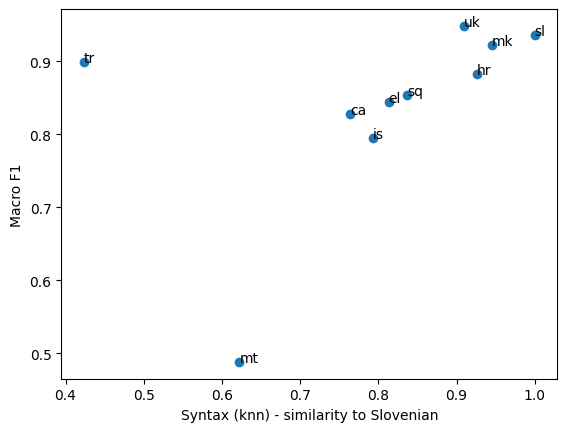

Pearsons correlation: 0.438
p-value: 0.20497930863233146
Spearmans correlation: 0.648
p-value: 0.04254012768448945


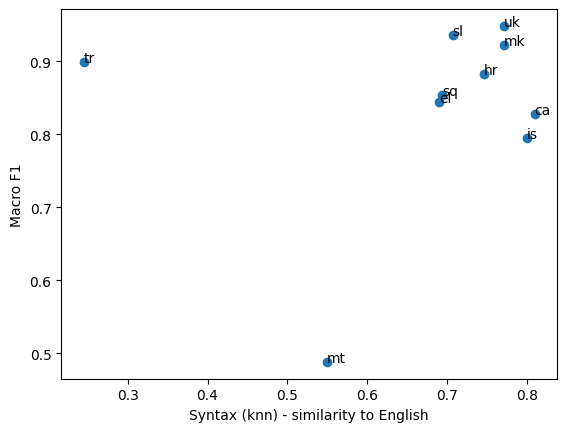

Pearsons correlation: 0.178
p-value: 0.6233237154689231
Spearmans correlation: 0.030
p-value: 0.9335717251179997


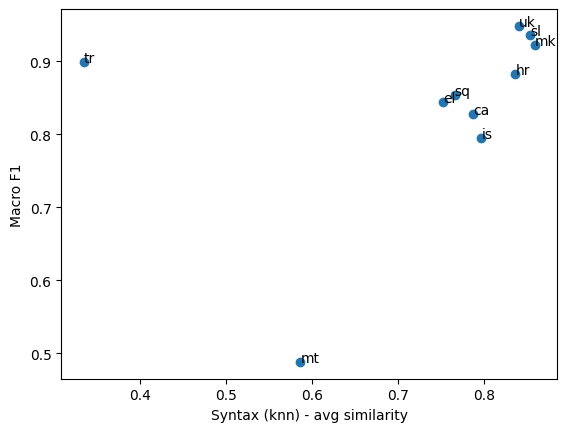

Pearsons correlation: 0.322
p-value: 0.3637020520832426
Spearmans correlation: 0.588
p-value: 0.07387770688865801


In [11]:
# Analyse the correlation
labels = syntax_knn_df["index"].to_list()
analyse(syntax_knn_df["similarity-to-sl"].to_list(), syntax_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = syntax_knn_df["index"].to_list()
analyse(syntax_knn_df["similarity-to-en"].to_list(), syntax_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = syntax_knn_df["index"].to_list()
analyse(syntax_knn_df["avg_similarity"].to_list(), syntax_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [12]:
inventory_knn_df = feature_df("inventory_knn")

inventory_knn_df

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.645497,0.822749,0.935625
1,hr,0.801784,0.552052,0.676918,0.882916
2,mk,0.723568,0.560473,0.642021,0.922638
3,is,0.617213,0.627495,0.622354,0.795338
4,tr,0.510688,0.517294,0.513991,0.899063
5,uk,0.681005,0.626411,0.653708,0.948327
6,ca,0.796003,0.645942,0.720973,0.827101
7,el,0.608781,0.471560,0.540170,0.843560
8,mt,0.547723,0.530330,0.539026,0.488408
9,sq,0.653197,0.600833,0.627015,0.854073


correlation for inventory knn

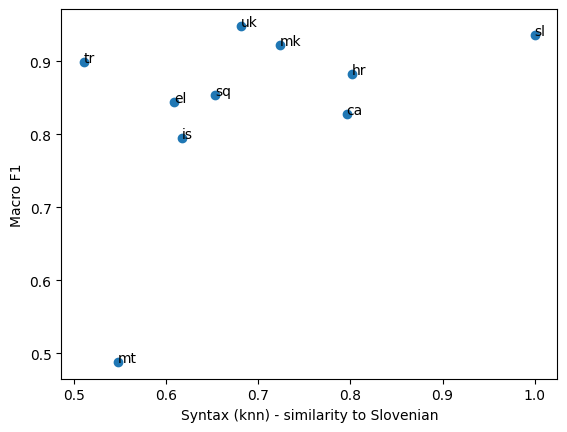

Pearsons correlation: 0.446
p-value: 0.19671506967293775
Spearmans correlation: 0.430
p-value: 0.21449233253280775


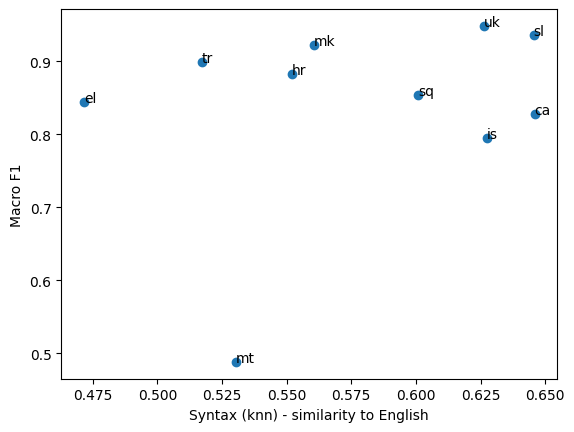

Pearsons correlation: 0.266
p-value: 0.45833649113169456
Spearmans correlation: 0.115
p-value: 0.7514196523258483


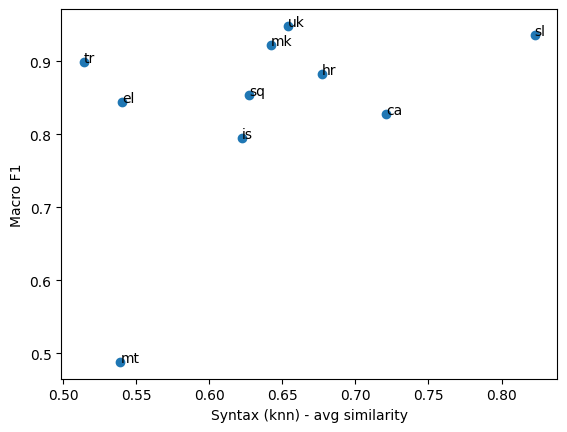

Pearsons correlation: 0.431
p-value: 0.2136116514226672
Spearmans correlation: 0.418
p-value: 0.22911284098281892


In [13]:
# Analyse the correlation
labels = inventory_knn_df["index"].to_list()
analyse(inventory_knn_df["similarity-to-sl"].to_list(), inventory_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = inventory_knn_df["index"].to_list()
analyse(inventory_knn_df["similarity-to-en"].to_list(), inventory_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = inventory_knn_df["index"].to_list()
analyse(inventory_knn_df["avg_similarity"].to_list(), inventory_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [14]:
inventory_average_df = feature_df("inventory_average")
inventory_average_df

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.645497,0.822749,0.935625
1,hr,0.801784,0.552052,0.676918,0.882916
2,mk,0.723568,0.560473,0.642021,0.922638
3,is,0.617213,0.627495,0.622354,0.795338
4,tr,0.584202,0.536321,0.560262,0.899063
5,uk,0.681005,0.626411,0.653708,0.948327
6,ca,0.796003,0.645942,0.720973,0.827101
7,el,0.608781,0.471560,0.540170,0.843560
8,mt,0.547723,0.530330,0.539026,0.488408
9,sq,0.663221,0.610053,0.636637,0.854073


correlation for inventory_average

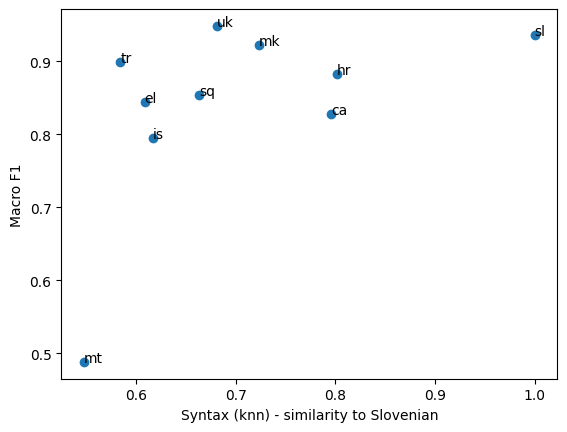

Pearsons correlation: 0.504
p-value: 0.13753468326127025
Spearmans correlation: 0.503
p-value: 0.13833369839449197


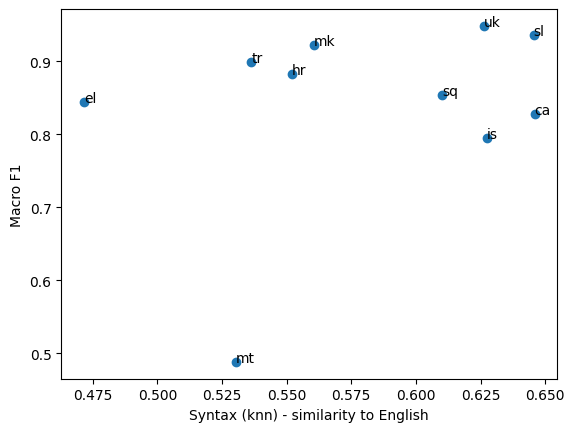

Pearsons correlation: 0.290
p-value: 0.4166540572518981
Spearmans correlation: 0.188
p-value: 0.603217610029209


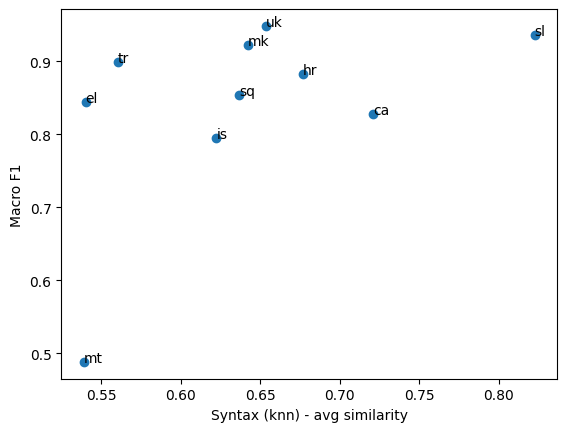

Pearsons correlation: 0.488
p-value: 0.15264450047949052
Spearmans correlation: 0.527
p-value: 0.11730806555020223


In [15]:
# Analyse the correlation
labels = inventory_average_df["index"].to_list()
analyse(inventory_average_df["similarity-to-sl"].to_list(), inventory_average_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = inventory_average_df["index"].to_list()
analyse(inventory_average_df["similarity-to-en"].to_list(), inventory_average_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = inventory_average_df["index"].to_list()
analyse(inventory_average_df["avg_similarity"].to_list(), inventory_average_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [16]:
fam_df = feature_df("fam")
fam_df

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.149071,0.574536,0.935625
1,hr,0.845154,0.125988,0.485571,0.882916
2,mk,0.730297,0.136083,0.433190,0.922638
3,is,0.182574,0.408248,0.295411,0.795338
4,tr,0.000000,0.000000,0.000000,0.899063
5,uk,0.600000,0.149071,0.374536,0.948327
6,ca,0.141421,0.105409,0.123415,0.827101
7,el,0.200000,0.149071,0.174536,0.843560
8,mt,0.000000,0.000000,0.000000,0.488408
9,sq,0.447214,0.333333,0.390273,0.854073


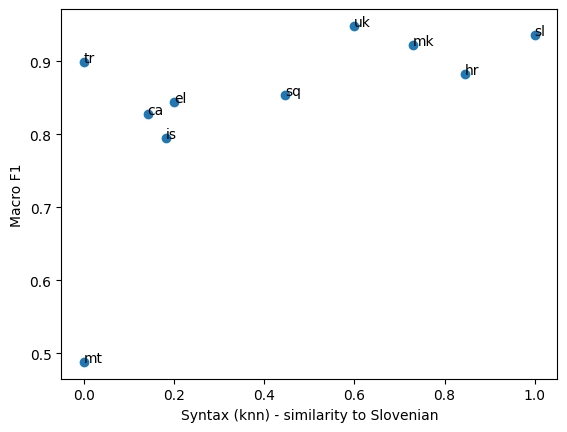

Pearsons correlation: 0.589
p-value: 0.07293026480754324
Spearmans correlation: 0.663
p-value: 0.03680640234866444


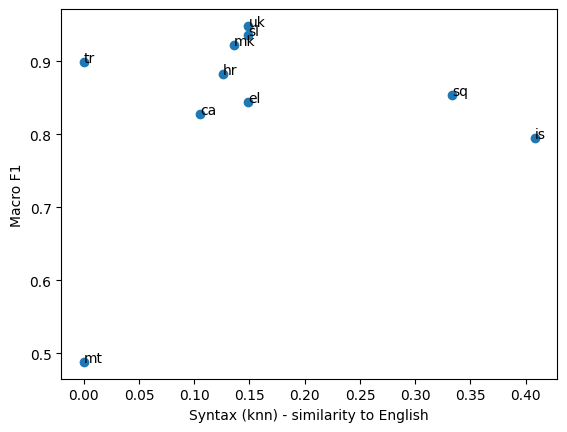

Pearsons correlation: 0.216
p-value: 0.5485041938559941
Spearmans correlation: 0.105
p-value: 0.7736158139144371


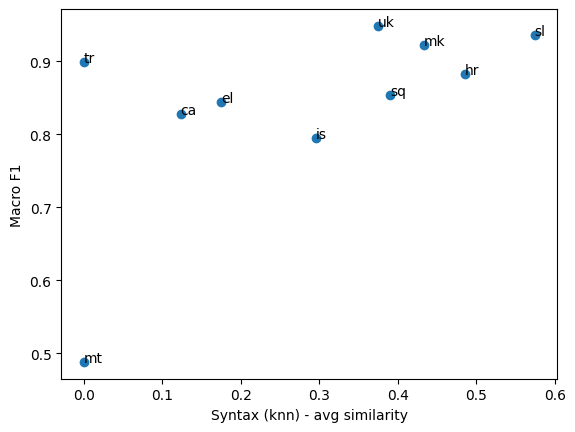

Pearsons correlation: 0.598
p-value: 0.06771962475808203
Spearmans correlation: 0.578
p-value: 0.08041257910277316


In [17]:
# Analyse the correlation
labels = fam_df["index"].to_list()
analyse(fam_df["similarity-to-sl"].to_list(), fam_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = fam_df["index"].to_list()
analyse(fam_df["similarity-to-en"].to_list(), fam_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = fam_df["index"].to_list()
analyse(fam_df["avg_similarity"].to_list(), fam_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [18]:
geo_df = feature_df("geo")
geo_df

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.996154,0.998077,0.935625
1,hr,0.999918,0.994968,0.997443,0.882916
2,mk,0.998775,0.990720,0.994747,0.922638
3,is,0.983692,0.994927,0.989310,0.795338
4,tr,0.994500,0.982463,0.988481,0.899063
5,uk,0.998801,0.992838,0.995820,0.948327
6,ca,0.997777,0.996586,0.997181,0.827101
7,el,0.998250,0.989549,0.993900,0.843560
8,mt,0.997221,0.989556,0.993389,0.488408
9,sq,0.999185,0.991900,0.995543,0.854073


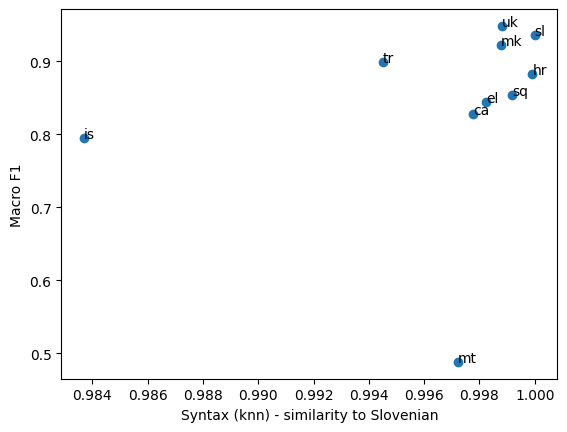

Pearsons correlation: 0.197
p-value: 0.5859255977411909
Spearmans correlation: 0.612
p-value: 0.05997214247725524


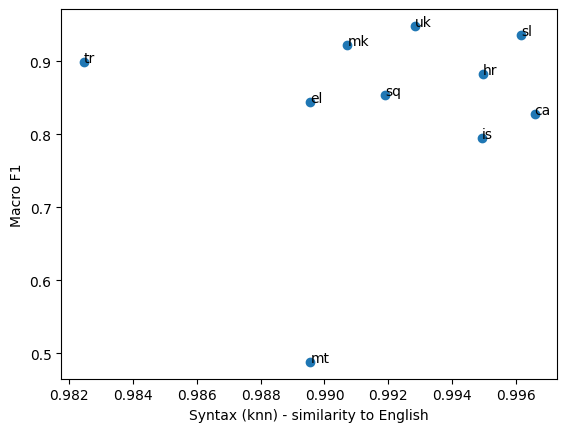

Pearsons correlation: 0.120
p-value: 0.741902890525256
Spearmans correlation: 0.067
p-value: 0.8548130882487426


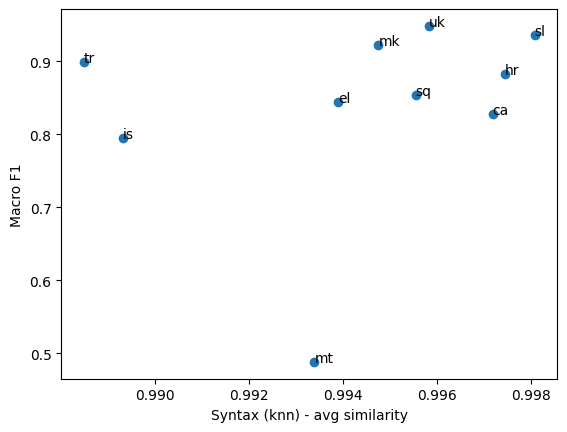

Pearsons correlation: 0.224
p-value: 0.533648240586378
Spearmans correlation: 0.430
p-value: 0.21449233253280775


In [19]:
# Analyse the correlation
labels = geo_df["index"].to_list()
analyse(geo_df["similarity-to-sl"].to_list(), geo_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = geo_df["index"].to_list()
analyse(geo_df["similarity-to-en"].to_list(), geo_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = geo_df["index"].to_list()
analyse(geo_df["avg_similarity"].to_list(), geo_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")